In [2]:
import csv
import pandas as pd
import sqlite3 
import matplotlib.pyplot as plt
%matplotlib inline




In [3]:
csv_movie_gross_file_path =".\\zippedData\\bom.movie_gross.csv.gz"
path ='\\Users\\eggfr\\Flatiron\\Flatiron_projects\\dsc-phase-1-project-v2-4\\zippedData\\bom.movie_gross.csv.gz'

In [4]:
mgross_df = pd.read_csv(csv_movie_gross_file_path)
mgross_df = mgross_df.dropna(subset=['domestic_gross','foreign_gross','studio'],how='any') #drop domestic_gross, and studio N/A value
mgross_df.domestic_gross = pd.to_numeric(mgross_df.domestic_gross)                  #change it to float
mgross_df.foreign_gross = mgross_df.foreign_gross.str.replace(',','').astype(float) #change it to float
mgross_df['total_gross'] = mgross_df.domestic_gross + mgross_df.foreign_gross  # total = domestic+foreign


In [5]:
opening_gross = mgross_df[['year','domestic_gross','foreign_gross']]
year_foreignstat = mgross_df.groupby(['year']).foreign_gross.sum()
year_foreignstat_df = year_foreignstat.to_frame()
year_domesticstat = mgross_df.groupby(['year']).domestic_gross.sum()
year_domesticstat_df = year_domesticstat.to_frame()

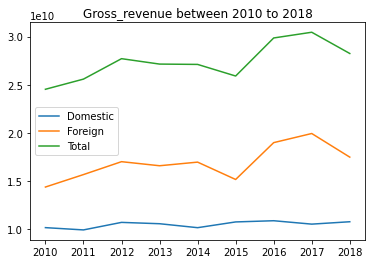

In [6]:
pt0_df = pd.concat([year_domesticstat_df,year_foreignstat_df], axis =1)
pt0_df ['total_gross'] = pt0_df['foreign_gross'] + pt0_df['domestic_gross']
pt0_df
df = pd.DataFrame({
   'Domestic': pt0_df['domestic_gross'],
   'Foreign': pt0_df['foreign_gross'],
    'Total' : pt0_df ['total_gross']
   }, index=[2010, 2011, 2012, 2013, 2014,2015,2016,2017,2018])
lines = df.plot.line(title = 'Gross_revenue between 2010 to 2018')

,domestic_gross,foreign_gross,year,total_gross
count,2.007000e+03,2.007000e+03,2007.000000,2.007000e+03
mean,4.701984e+07,7.579038e+07,2013.506228,1.228102e+08
std,8.162689e+07,1.381796e+08,2.597997,2.075562e+08
min,4.000000e+02,6.000000e+02,2010.000000,4.900000e+03
25%,6.700000e+05,3.900000e+06,2011.000000,8.239000e+06
50%,1.670000e+07,1.940000e+07,2013.000000,4.240000e+07
75%,5.605000e+07,7.595000e+07,2016.000000,1.337500e+08
max,9.367000e+08,9.605000e+08,2018.000000,1.518900e+09


In [7]:
imdb_file_path =".\\zippedData\\sqldataframephase1.csv"

In [8]:
imdb_df = pd.read_csv(imdb_file_path)


In [9]:
merge_imdb_mgorss_df = mgross_df.merge(imdb_df,how = "left", left_on ='title', right_on='primary_title')

In [32]:
merge_imdb_mgorss_df.isna().sum()
pt2_merge_df = merge_imdb_mgorss_df.dropna(subset=['runtime_minutes'])
pt2_merge_df

,title,studio,domestic_gross,foreign_gross,year,total_gross,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09,104.0,tt0435761,Toy Story 3,Toy Story 3,2010.0,103.0,"Adventure,Animation,Comedy"
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,7066.0,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08,424.0,tt0892791,Shrek Forever After,Shrek Forever After,2010.0,93.0,"Adventure,Animation,Comedy"
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000.0,2010,6.985000e+08,6661.0,tt1325004,The Twilight Saga: Eclipse,The Twilight Saga: Eclipse,2010.0,124.0,"Adventure,Drama,Fantasy"
6,Iron Man 2,Par.,312400000.0,311500000.0,2010,6.239000e+08,5998.0,tt1228705,Iron Man 2,Iron Man 2,2010.0,124.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,Bilal: A New Breed of Hero,VE,491000.0,1700000.0,2018,2.191000e+06,62066.0,tt3576728,Bilal: A New Breed of Hero,Bilal: A New Breed of Hero,2015.0,105.0,"Action,Adventure,Animation"
2474,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06,30463.0,tt2160105,I Still See You,I Still See You,2018.0,98.0,"Fantasy,Thriller"
2475,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05,80158.0,tt4602066,The Catcher Was a Spy,The Catcher Was a Spy,2018.0,98.0,"Biography,Drama,War"
2476,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05,114443.0,tt6769280,Time Freak,Time Freak,2018.0,104.0,"Comedy,Drama,Romance"


In [11]:
studio_stat = mgross_df.groupby(['studio']).foreign_gross.sum()
studio_stat_df = studio_stat.to_frame()
studio_stat_df.sort_values(by=['foreign_gross'], ascending = False)
film_stat = mgross_df.groupby(['studio']).title.count()
film_stat_df = film_stat.to_frame()
studio_stat_df.shape


pt1_df = pd.concat([film_stat_df,studio_stat_df,], axis =1)
pt1_df['avg_foreign_gross'] = pt1_df['foreign_gross'] / pt1_df['title']
pt1_df  =pt1_df.sort_values(by=['avg_foreign_gross'], ascending = False)
pt1_df = pt1_df[pt1_df.title > 16]                        # 2 movies per year as my qualifier to filter out studio that produces just a few movies
pt1_df = pt1_df.rename(columns={'title':'#_of_movies'})   #rename pt1_df['title'] to number of movies
pt1_df.head()

,#_of_movies,foreign_gross,avg_foreign_gross
studio,,,
BV,104,2.579385e+10,2.480178e+08
Fox,134,2.005587e+10,1.496706e+08
WB (NL),44,6.339000e+09,1.440682e+08
WB,130,1.866790e+10,1.435993e+08
Sony,105,1.394524e+10,1.328118e+08


In [84]:
studiobv_grp = pt2_merge_df.groupby(['studio'])    #group by studio
studiobv_grp = studiobv_grp.get_group('BV').sort_values(by=['foreign_gross'], ascending = False)
studiobv_grp = studiobv_grp.drop_duplicates(subset=["title"],keep = False) # drop duplicate


In [87]:
studio_WBgrp = pt2_merge_df.groupby(['studio'])                                             #repeat for the next 4 top earning foreign studios                          
studio_WBgrp = studio_WBgrp.get_group('WB').sort_values(by=['foreign_gross'], ascending = False)
studio_WBgrp = studio_WBgrp.drop_duplicates(subset=["title"],keep = False)
studio_WBgrp

,title,studio,domestic_gross,foreign_gross,year,total_gross,Unnamed: 0,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
2274,Aquaman,WB,335100000.0,812700000.0,2018,1.147800e+09,8065.0,tt1477834,Aquaman,Aquaman,2018.0,143.0,"Action,Adventure,Fantasy"
733,The Dark Knight Rises,WB,448100000.0,636800000.0,2012,1.084900e+09,6900.0,tt1345836,The Dark Knight Rises,The Dark Knight Rises,2012.0,164.0,"Action,Thriller"
1822,Batman v Superman: Dawn of Justice,WB,330400000.0,543300000.0,2016,8.737000e+08,50145.0,tt2975590,Batman v Superman: Dawn of Justice,Batman v Superman: Dawn of Justice,2016.0,151.0,"Action,Adventure,Fantasy"
2283,Detective Chinatown 2,WB,2000000.0,542100000.0,2018,5.441000e+08,126784.0,tt7752454,Detective Chinatown 2,Tang ren jie tan an 2,2018.0,121.0,"Action,Comedy,Mystery"
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08,7066.0,tt1375666,Inception,Inception,2010.0,148.0,"Action,Adventure,Sci-Fi"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023,Midnight Special,WB,3700000.0,2500000.0,2016,6.200000e+06,44643.0,tt2649554,Midnight Special,Midnight Special,2016.0,112.0,"Action,Drama,Mystery"
204,Jonah Hex,WB,10500000.0,356000.0,2010,1.085600e+07,5509.0,tt1075747,Jonah Hex,Jonah Hex,2010.0,81.0,"Action,Drama,Fantasy"
534,A Very Harold & Kumar 3D Christmas,WB,35100000.0,326000.0,2011,3.542600e+07,6241.0,tt1268799,A Very Harold & Kumar 3D Christmas,A Very Harold & Kumar 3D Christmas,2011.0,90.0,"Adventure,Comedy"
867,Joyful Noise,WB,30900000.0,226000.0,2012,3.112600e+07,14211.0,tt1710396,Joyful Noise,Joyful Noise,2012.0,118.0,"Comedy,Drama,Music"


In [14]:
studio_Sonygrp = pt2_merge_df.groupby(['studio'])
studio_Sonygrp = studio_Sonygrp.get_group('Sony').sort_values(by=['foreign_gross'], ascending = False)
studio_Sonygrp = studio_Sonygrp.drop_duplicates(subset=["title"],keep = False)


In [15]:
studio_Foxgrp = pt2_merge_df.groupby(['studio'])
studio_Foxgrp = studio_Foxgrp.get_group('Fox').sort_values(by=['foreign_gross'], ascending = False)
studio_Foxgrp = studio_Foxgrp.drop_duplicates(subset=["title"],keep = False)


In [16]:
studio_WBNLgrp = pt2_merge_df.groupby(['studio'])
studio_WBNLgrp = studio_WBNLgrp.get_group('WB (NL)').sort_values(by=['foreign_gross'], ascending = False)
studio_WBNLgrp = studio_WBNLgrp.drop_duplicates(subset=["title"],keep = False)


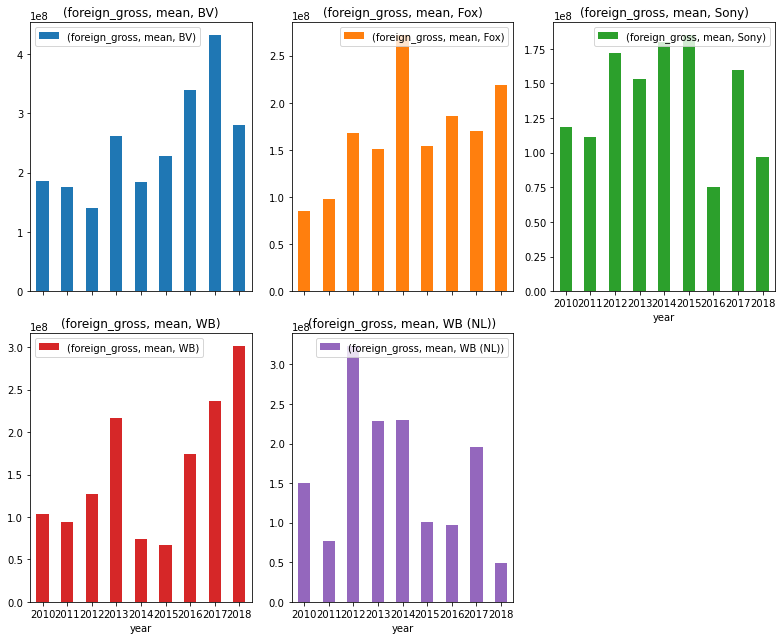

In [17]:
studiotop5_df = pd.concat([studiobv_grp,studio_WBgrp,studio_Sonygrp,studio_Foxgrp,studio_WBNLgrp], axis =0)
grouped_single = studiotop5_df.groupby(['studio','year']).agg({'foreign_gross':['mean']})
grouped_single
ax = grouped_single.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(11, 9), layout=(2, 3))
plt.tight_layout()

<AxesSubplot:xlabel='runtime_minutes', ylabel='domestic_gross'>

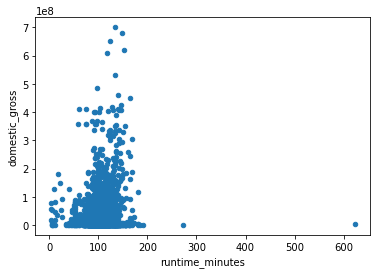

In [18]:
runtime_df = pt2_merge_df[['runtime_minutes','foreign_gross','domestic_gross']]
#x = runtime_df['runtime_minutes']
#y = runtime_df['foreign_gross']
runtime_df.plot(kind='scatter', x='runtime_minutes', y='domestic_gross')


In [19]:
studio_statd = mgross_df.groupby(['studio']).domestic_gross.sum()
studio_statd_df = studio_statd.to_frame()
studio_statd_df.sort_values(by=['domestic_gross'], ascending = False)
film_statd = mgross_df.groupby(['studio']).title.count()
film_statd_df = film_statd.to_frame()
studio_statd_df.shape


pt3_df = pd.concat([film_stat_df,studio_statd_df,], axis =1)
pt3_df['avg_domestic_gross'] = pt3_df['domestic_gross'] / pt3_df['title']
pt3_df  =pt3_df.sort_values(by=['avg_domestic_gross'], ascending = False)
pt3_df = pt3_df[pt3_df.title > 16]                        # 2 movies per year as my qualifier to filter out studio that produces just a few movies
pt3_df = pt3_df.rename(columns={'title':'#_of_movies'})   #rename pt1_df['title'] to number of movies
pt3_df.head()

,#_of_movies,domestic_gross,avg_domestic_gross
studio,,,
BV,104,1.839653e+10,1.768897e+08
WB,130,1.212360e+10,9.325846e+07
WB (NL),44,3.975100e+09,9.034318e+07
Uni.,144,1.289204e+10,8.952804e+07
Fox,134,1.092450e+10,8.152612e+07


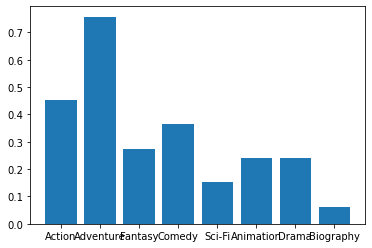

In [83]:
studiobv_grpd = pt2_merge_df.groupby(['studio'])    #group by studio
studiobv_grpd = studiobv_grpd.get_group('BV').sort_values(by=['domestic_gross'], ascending = False)
studiobv_grpd = studiobv_grpd.drop_duplicates(subset=["title"],keep = False)  # drop duplicate
action_plan1_df = studiobv_grpd.loc[(studiobv_grpd['year'] >=2015)]
action_plan1_df.genres
genres_dom_action = (action_plan1_df[action_plan1_df['genres'].str.contains('Action')])
genres_dom_action_count = len(genres_dom_action.index)/len(action_plan1_df.genres)
genres_dom_adv = (action_plan1_df[action_plan1_df['genres'].str.contains('Adventure')])
genres_dom_adv_count = len(genres_dom_adv.index)/len(action_plan1_df.genres)
genres_dom_fan = (action_plan1_df[action_plan1_df['genres'].str.contains('Fantasy')])
genres_dom_fan_count = len(genres_dom_fan.index)/len(action_plan1_df.genres)
genres_dom_com = (action_plan1_df[action_plan1_df['genres'].str.contains('Comedy')])
genres_dom_com_count = len(genres_dom_com.index)/len(action_plan1_df.genres)
genres_dom_sci = (action_plan1_df[action_plan1_df['genres'].str.contains('Sci-Fi')])
genres_dom_sci_count = len(genres_dom_sci.index)/len(action_plan1_df.genres)
genres_dom_ani = (action_plan1_df[action_plan1_df['genres'].str.contains('Animation')])
genres_dom_ani_count = len(genres_dom_ani.index)/len(action_plan1_df.genres)
genres_dom_dra = (action_plan1_df[action_plan1_df['genres'].str.contains('Drama')])
genres_dom_dra_count = len(genres_dom_ani.index)/len(action_plan1_df.genres)
genres_dom_bio = (action_plan1_df[action_plan1_df['genres'].str.contains('Biography')])
genres_dom_bio_count = len(genres_dom_bio.index)/len(action_plan1_df.genres)
dom_genres_count_list =[genres_dom_action_count,genres_dom_adv_count,genres_dom_fan_count,genres_dom_com_count,genres_dom_sci_count,genres_dom_ani_count,genres_dom_dra_count,genres_dom_bio_count]
dom_genres_count_list
dom_genres_type_list =['Action','Adventure','Fantasy','Comedy','Sci-Fi','Animation','Drama','Biography']
plt.bar(dom_genres_type_list, dom_genres_count_list)
plt.show()

In [66]:
action_plan1_df.genres

2271       Action,Adventure,Sci-Fi
2270       Action,Adventure,Sci-Fi
2049      Action,Adventure,Fantasy
2273    Action,Adventure,Animation
1817       Action,Adventure,Sci-Fi
1818    Adventure,Animation,Comedy
1568       Action,Adventure,Sci-Fi
1816       Action,Adventure,Sci-Fi
2056       Action,Adventure,Comedy
1819    Adventure,Animation,Comedy
2057       Action,Adventure,Comedy
1827    Adventure,Animation,Comedy
1826      Action,Adventure,Fantasy
2280       Action,Adventure,Comedy
2292      Action,Adventure,Fantasy
2285    Adventure,Animation,Comedy
1586       Action,Adventure,Comedy
2064      Action,Adventure,Fantasy
2299         Comedy,Family,Fantasy
2076    Adventure,Animation,Comedy
1593    Adventure,Animation,Comedy
2324      Adventure,Family,Fantasy
1847      Adventure,Family,Fantasy
1624        Drama,History,Thriller
1868      Adventure,Family,Fantasy
2315      Adventure,Family,Fantasy
1711         Biography,Drama,Sport
1941          Action,Drama,History
1754                

In [21]:
studio_WBgrpd = pt2_merge_df.groupby(['studio'])                                             #repeat for the next 4 top earning foreign studios                          
studio_WBgrpd = studio_WBgrpd.get_group('WB').sort_values(by=['domestic_gross'], ascending = False)
studio_WBgrpd = studio_WBgrpd.drop_duplicates(subset=["title"],keep = False)

In [22]:
studio_WBNLgrpd = pt2_merge_df.groupby(['studio'])
studio_WBNLgrpd = studio_WBNLgrpd.get_group('WB (NL)').sort_values(by=['domestic_gross'], ascending = False)
studio_WBNLgrpd = studio_WBNLgrpd.drop_duplicates(subset=["title"],keep = False)

In [23]:
studio_Foxgrpd = pt2_merge_df.groupby(['studio'])
studio_Foxgrpd = studio_Foxgrpd.get_group('Fox').sort_values(by=['domestic_gross'], ascending = False)
studio_Foxgrpd = studio_Foxgrpd.drop_duplicates(subset=["title"],keep = False)


In [24]:
studio_Unigrpd = pt2_merge_df.groupby(['studio'])
studio_Unigrpd = studio_Unigrpd.get_group('Uni.').sort_values(by=['domestic_gross'], ascending = False)
studio_Unigrpd = studio_Unigrpd.drop_duplicates(subset=["title"],keep = False)


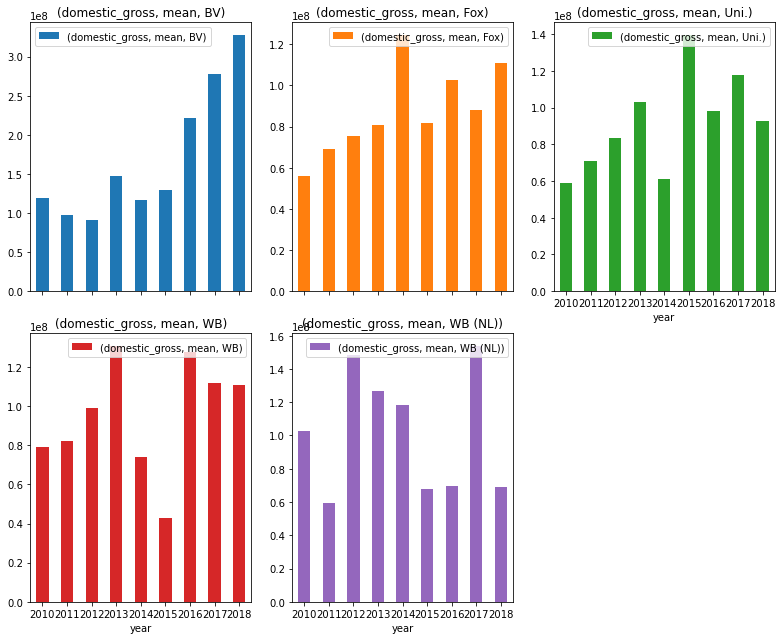

In [25]:
studiotop5_df = pd.concat([studiobv_grpd,studio_WBgrpd,studio_Unigrpd,studio_Foxgrpd,studio_WBNLgrpd], axis =0)
grouped_single = studiotop5_df.groupby(['studio','year']).agg({'domestic_gross':['mean']})
grouped_single
ax = grouped_single.unstack(level=0).plot(kind='bar', subplots=True, rot=0, figsize=(11, 9), layout=(2, 3))
plt.tight_layout()

In [26]:
#csv_movie_budgets_file_path =".\\zippedData\\tn.movie_budgets.csv.gz"

In [27]:
#mbudget_df = pd.read_csv(csv_movie_budgets_file_path)

In [28]:
#mbudget_df['production_budget'] = mbudget_df['production_budget'].str.replace('$','').str.replace(',','')
#mbudget_df.production_budget = pd.to_numeric(mbudget_df.production_budget).astype(float)
#mbudget_df['domestic_gross'] = mbudget_df['domestic_gross'].str.replace('$','').str.replace(',','')
#mbudget_df.domestic_gross = pd.to_numeric(mbudget_df.domestic_gross).astype(float)
#mbudget_df['worldwide_gross'] = mbudget_df['worldwide_gross'].str.replace('$','').str.replace(',','')
#mbudget_df.worldwide_gross = pd.to_numeric(mbudget_df.worldwide_gross).astype(float)
#mbudget_df['total_net_gross'] = mbudget_df['worldwide_gross'] + mbudget_df['domestic_gross']
#mbudget_df['foreign_gross'] = mbudget_df['worldwide_gross'] - mbudget_df['domestic_gross']
#mbudget_df['profit_percent'] =  (mbudget_df['total_net_gross'] - mbudget_df['production_budget'])/ mbudget_df['production_budget'] * 100
#mbudget_df['profit_percent_domestic'] = (mbudget_df['domestic_gross'] - mbudget_df['production_budget']) / mbudget_df['production_budget'] * 100
#mbudget_df['profit_percent_foreign'] = (mbudget_df['foreign_gross'] - mbudget_df['production_budget']) / mbudget_df['production_budget'] * 100

In [29]:
#mbudget_df['year']=mbudget_to_datetime(df['release_date'],format=%y%m%d)